<img src="../Pics/MLSb-T.png" width="160">
<br><br>
# <center><u>Plotting Decision Boundaries</u></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [2]:
df=pd.read_csv("../data/iris.csv")
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [4]:
df['class']=le.transform(df['Species'].values)

In [ ]:
df

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['PetalLengthCm','PetalWidthCm']], df['class'], 
                                                    test_size=0.3, random_state= 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [8]:
X_combined_std

array([[-0.18295039, -0.29145882],
       [ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ],
       [ 0.6522579 ,  0.35146505],
       [ 1.09770233,  0.73721938],
       [ 0.03977182, -0.16287405],
       [ 1.26474398,  1.38014325],
       [ 0.48521625,  0.48004983],
       [-0.01590873, -0.16287405],
       [ 0.59657735,  0.73721938],
       [ 0.70793846,  0.35146505],
       [ 0.37385514,  0.6086346 ],
       [ 0.6522579 ,  0.86580415],
       [ 0.48521625,  0.22288028],
       [ 0.76361901,  0.99438893],
       [ 0.37385514,  0.48004983],
       [-1.24088089, -1.32013702],
       [ 0.70793846,  0.86580415],
       [ 0.20681348,  0.0942955 ],
       [-0.12726983,  0.0942955 ],
       [ 0.09545238,  0.0942955 ],
       [ 0.42953569,  0.22288028],
       [ 1.20906343,  0.73721938],
       [-1.29656144, -1.32013702],
       [-1.51928365, -1.4487218 ],
       [ 0.81929956,  0.86580415],
       [ 0.20681348, -0.03428927],
       [-1.18520034, -1.32013702],
       [-1.29656144,

In [ ]:
x1min, x1max = X_combined_std[:,0].min() -1, X_combined_std[:,0].max() + 1
x2min, x2max = X_combined_std[:,1].min() -1, X_combined_std[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,0.02),np.arange(x2min,x2max,0.02))

In [ ]:
colors = ('red','blue','yellow','green')
cmap = ListedColormap(colors[:len(np.unique(y_combined))])
cmap.colors

In [17]:
def plot_regions(X, y, classifier):
    markers = ('x','>','*')
    colors = ('red','blue','yellow','green')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    res = 0.02
    #Plot regions
    x1min, x1max = X[:,0].min() -1, X[:,0].max() + 1
    x2min, x2max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,res),np.arange(x2min,x2max,res))

    output = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    output = output.reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    plt.pcolormesh(xx1,xx2, output, cmap=plt.cm.Accent)
    #plt.contourf(xx1, xx2, output, alpha=0.4, cmap=cmap)
    #PLOT ALL SAMPLES
    for index, item in enumerate(np.unique(y)):
        plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=cmap(index),
        marker=markers[index], label=item)

    plt.xlabel('petal length std')
    plt.ylabel('petal width std')

    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    plt.legend(loc='best',bbox_to_anchor=(0.5, 1.05),
          ncol=3,fancybox=True, shadow=True)
    
    plt.show()

## Plotting Logistic Regression Regions:

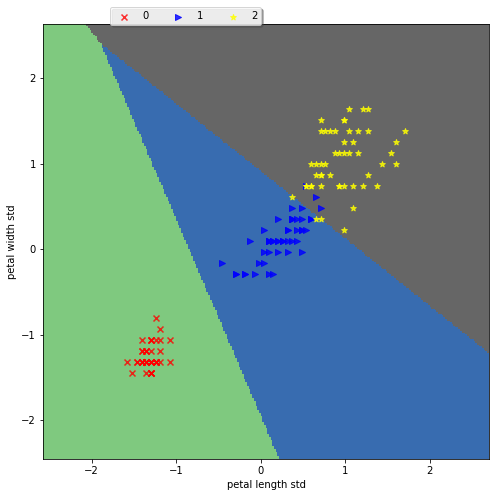

In [18]:
lr = LogisticRegression(C=1000.0,random_state=0,n_jobs=-1)
lr.fit(X_train_std, y_train)
plot_regions(X=X_combined_std,y=y_combined,classifier=lr)